<a href="https://colab.research.google.com/github/am-bean/SummerDoctoralProgram/blob/main/RegressionExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import os.path as path

In [ ]:
data_csv = 'regression_example.csv'
if not path.exists(data_csv):
    data_csv = 'https://raw.githubusercontent.com/am-bean/SummerDoctoralProgram/main/regression_example.csv'

df = pd.read_csv(data_csv,skiprows=1)

df = df.iloc[:-7,:]
df['%Women'] = df['%Women'].astype(float).copy()
df['%Internet'] = df['%Internet'].astype(float).copy()

In [ ]:
df.head()

,Country,%Women,%Internet
0,Rwanda,61.3,30.5
1,Cuba,53.4,71.1
2,Nicaragua,51.7,57.1
3,Mexico,50.0,75.6
4,New Zealand,50.0,95.9


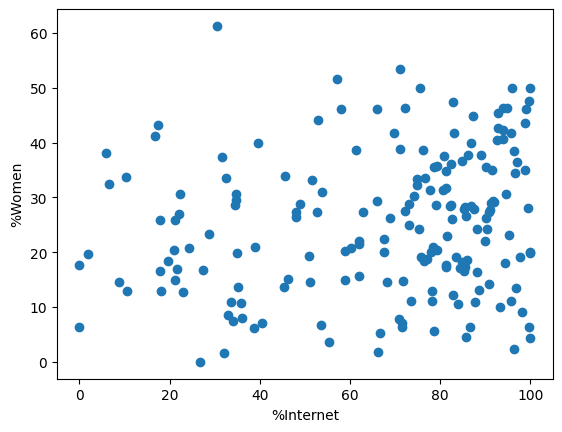

In [ ]:
plt.figure()
plt.scatter('%Internet', '%Women', data=df)
plt.xlabel("%Internet")
plt.ylabel("%Women")
plt.show()

In [71]:
my_lm = sm.OLS(df['%Women'],sm.add_constant(df['%Internet'])).fit()
print(my_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 %Women   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     6.292
Date:                Wed, 05 Jul 2023   Prob (F-statistic):             0.0130
Time:                        21:14:03   Log-Likelihood:                -734.51
No. Observations:                 186   AIC:                             1473.
Df Residuals:                     184   BIC:                             1479.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.5782      2.462      7.951      0.0

In [72]:
x = np.linspace(df['%Internet'].min(),df['%Internet'].max(),100)
y = x * my_lm.params['%Internet'] + my_lm.params['const']

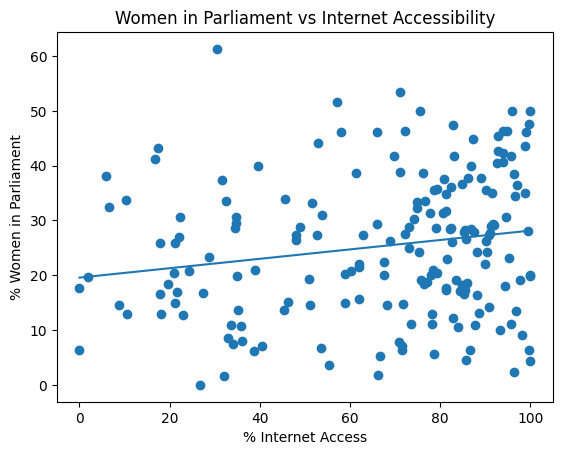

In [73]:
plt.figure()
plt.scatter('%Internet', '%Women', data=df)
plt.plot(x,y)
plt.xlabel("% Internet Access")
plt.ylabel("% Women in Parliament")
plt.title('Women in Parliament vs Internet Accessibility')
plt.show()